In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math as math
from math import exp, sin, pi, sqrt
from statistics import mean

We consider the Lotka-Voltera predator-prey relationships:

<br><center> Prey Equation 
<br>
<br>
$$ \frac{dx}{dt} = \alpha x - \beta xy$$

<br><center> Predator Equation 
<br>    
$$ \frac{dy}{dt} = \delta xy-\gamma y$$

and these parameters
$$\alpha x=$$ <center> growth rate of prey 
$$\beta xy =$$ <center> death rate of prey 
$$\delta xy =$$ <center> growth rate of predator 
$$\gamma y =$$ <center> death rate of predator 

In [2]:
#parameters for baboon-cheetah relationship
alpha=1.1  
beta=0.4
delta=0.1
gamma=0.4
#for the presentation I change the birth rates for these, uncomment to see result
#alpha=1.5
#beta=0.4
#delta=0.5
#gamma=0.4

#mutualistic - uncomment to see
#alpha=0.4
#beta=0.4
#delta=0.3
#gamma=0.3


In [3]:
ti=0
tf=100  #100
dt=0.01 #.01
itr=int(tf/dt)
t=np.linspace(ti,tf,itr+1)

#pre-allocate
x = np.zeros(itr+1) 
y = np.zeros(itr+1) 

In [4]:
#initial conditions
x[0]=10. #initial prey population
y[0]=10. #initial predator population
x0=10. 
y0=10. 

In [5]:
#functions
fx= lambda x,y: (alpha*x)-(beta*x*y) 
fy= lambda x,y: (delta*x*y)-(gamma*y)

Text(0, 0.5, 'predator')

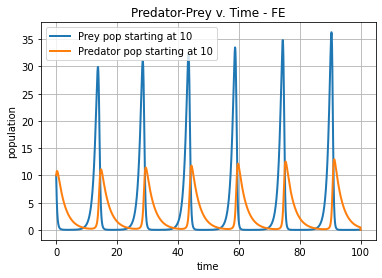

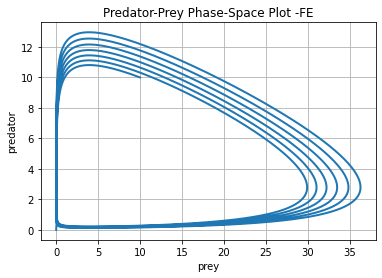

In [6]:
#forward Euler 
def fwdeul(x0,y0,t):
    t=np.arange(0, tf, dt)
    for i in np.arange(0,itr-1): 
        x[i+1] = x[i] + (fx(x[i], y[i]))*dt 
        y[i+1] = y[i] + (fy(x[i], y[i]))*dt
    return x,y
    

fwdeul(x0,y0,t)
FE_int=fwdeul(x0,y0,t)

    
plt.figure()
plt.grid()
plt.title("Predator-Prey v. Time - FE")
plt.plot(t, x, linewidth=2, label='Prey pop starting at 10')
plt.plot(t, y, linewidth=2, label='Predator pop starting at 10')
plt.xlabel('time')
plt.ylabel('population')
plt.legend()

plt.figure()
plt.grid()
plt.title("Predator-Prey Phase-Space Plot -FE")
plt.plot(x, y, linewidth=2)
plt.xlabel('prey')
plt.ylabel('predator')

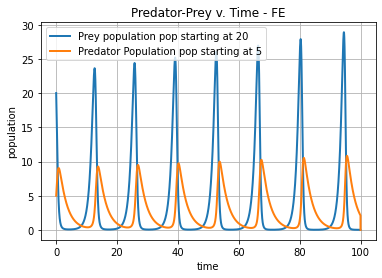

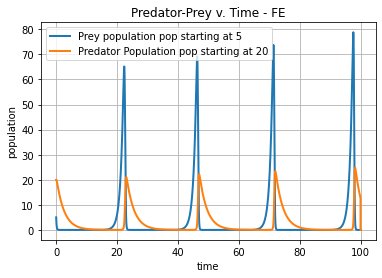

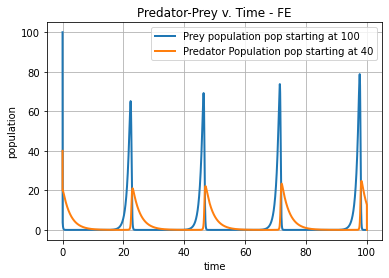

In [7]:
x[0]=20
y[0]=5
fwdeul(x0,y0,t) 
plt.figure()
plt.title("Predator-Prey v. Time - FE")
plt.grid()
plt.plot(t, x, linewidth=2, label='Prey population pop starting at 20')
plt.plot(t, y, linewidth=2, label='Predator Population pop starting at 5')
plt.xlabel('time')
plt.ylabel('population')
plt.legend()

x[0]=5
y[0]=20
fwdeul(x0,y0,t)

plt.figure()
plt.title("Predator-Prey v. Time - FE")
plt.grid()
plt.plot(t, x, linewidth=2, label='Prey population pop starting at 5')
plt.plot(t, y, linewidth=2, label='Predator Population pop starting at 20')
plt.xlabel('time')
plt.ylabel('population')
plt.legend()


x[0]=100.
y[0]=40.
plt.figure()
plt.title("Predator-Prey v. Time - FE")
plt.grid()
plt.plot(t, x, linewidth=2, label='Prey population pop starting at 100')
plt.plot(t, y, linewidth=2, label='Predator Population pop starting at 40')
plt.xlabel('time')
plt.ylabel('population')
plt.legend()

In [8]:
#pre-allocate
x = np.zeros(itr+1) 
y = np.zeros(itr+1) 
x[0]=10. #initial baboon (prey) population
y[0]=10. #initial cheetah (predator) population

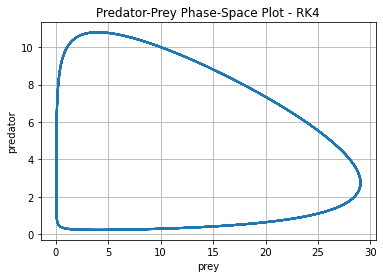

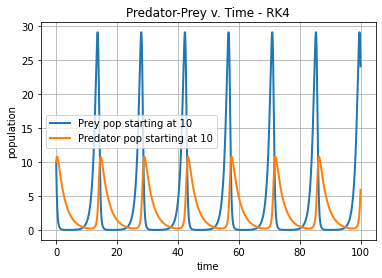

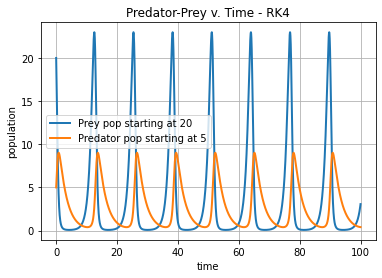

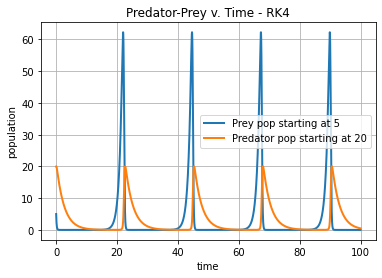

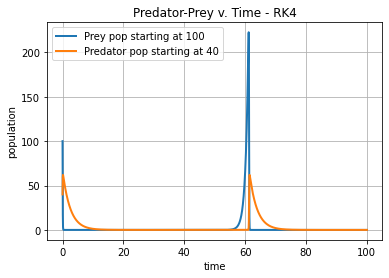

In [9]:
#Runge-Kutta 4
def rungkutta(x,y):
    for i in np.arange(0,itr):
        k1_x = fx(x[i],y[i])*dt
        k1_y = fy(x[i],y[i])*dt
    
        k2_x = (fx(x[i]+(0.5*k1_x),y[i]+(0.5*k1_y)))*dt  
        k2_y = (fy(x[i]+(0.5*k1_x),y[i]+(0.5*k1_y)))*dt
    
        k3_x = (fx(x[i]+(0.5*k2_x),y[i]+(0.5*k2_y)))*dt  
        k3_y = (fy(x[i]+(0.5*k2_x),y[i]+(0.5*k2_y)))*dt
    
        k4_x = (fx(x[i]+(k3_x),y[i]+(k3_y)))*dt  
        k4_y = (fy(x[i]+(k3_x),y[i]+(k3_y)))*dt
    
        x[i+1] = x[i] + (1/6)*(k1_x+(2*k2_x)+(2*k3_x)+k4_x)
        y[i+1] = y[i] + (1/6)*(k1_y+(2*k2_y)+(2*k3_y)+k4_y)
    return x,y


rungkutta(x,y)

plt.figure()
plt.grid()
plt.title("Predator-Prey Phase-Space Plot - RK4")
plt.plot(x, y, linewidth=2)
plt.xlabel('prey')
plt.ylabel('predator')

    
plt.figure()
plt.grid()
plt.title("Predator-Prey v. Time - RK4")
plt.plot(t, x, linewidth=2, label='Prey pop starting at 10')
plt.plot(t, y, linewidth=2, label='Predator pop starting at 10')
plt.xlabel('time')
plt.ylabel('population')
plt.legend()


x[0]=20.
y[0]=5.
rungkutta(x,y)

plt.figure()
plt.grid()
plt.title("Predator-Prey v. Time - RK4")
plt.plot(t, x, linewidth=2, label='Prey pop starting at 20')
plt.plot(t, y, linewidth=2, label='Predator pop starting at 5')
plt.xlabel('time')
plt.ylabel('population')
plt.legend()


x[0]=5.
y[0]=20.
rungkutta(x,y)

plt.figure()
plt.grid()
plt.title("Predator-Prey v. Time - RK4")
plt.plot(t, x, linewidth=2, label='Prey pop starting at 5')
plt.plot(t, y, linewidth=2, label='Predator pop starting at 20')
plt.xlabel('time')
plt.ylabel('population')
plt.legend()


x[0]=100.
y[0]=40.
rungkutta(x,y)

plt.figure()
plt.grid()
plt.title("Predator-Prey v. Time - RK4")
plt.plot(t, x, linewidth=2, label='Prey pop starting at 100')
plt.plot(t, y, linewidth=2, label='Predator pop starting at 40')
plt.xlabel('time')
plt.ylabel('population')
plt.legend()

In [ ]:
#note: RESET KERNEL BEFORE RUNNING or the arrays will not work!
x = np.zeros(itr+1) 
y = np.zeros(itr+1) 
x0=10
y0=10
dt=.01
x[0]=10
y[0]=10
fwdeul(x0,y0,t)
FE_int=np.asarray(fwdeul(x0,y0,t))  

rungkutta(x,y)
RK4_int=np.asarray(rungkutta(x,y))

#error
ti=0
tf=100
dt=0.0001 
itr=int(tf/dt)
x = np.zeros(itr+1) 
y = np.zeros(itr+1) 
itr=int(tf/dt)

x[0]=10.
y[0]=10.


def rk4exact(x,y):
    for i in np.arange(0,itr):
        k1_x = fx(x[i],y[i])*dt
        k1_y = fy(x[i],y[i])*dt
    
        k2_x = (fx(x[i]+(0.5*k1_x),y[i]+(0.5*k1_y)))*dt  
        k2_y = (fy(x[i]+(0.5*k1_x),y[i]+(0.5*k1_y)))*dt
    
        k3_x = (fx(x[i]+(0.5*k2_x),y[i]+(0.5*k2_y)))*dt  
        k3_y = (fy(x[i]+(0.5*k2_x),y[i]+(0.5*k2_y)))*dt
    
        k4_x = (fx(x[i]+(k3_x),y[i]+(k3_y)))*dt  
        k4_y = (fy(x[i]+(k3_x),y[i]+(k3_y)))*dt
    
        x[i+1] = x[i] + (1/6)*(k1_x+(2*k2_x)+(2*k3_x)+k4_x)
        y[i+1] = y[i] + (1/6)*(k1_y+(2*k2_y)+(2*k3_y)+k4_y)
        
    return x,y
    
rk4exact(x,y)

exact_int=np.asarray(rk4exact(x,y))
exact_int=exact_int[:,0::100]  #0:100000:10000  #:,0::10


errfwd=np.zeros(2)
errrk4=np.zeros(2)
n=10000
for i in range(0,2):
    errfwd[i]=((1/n)*np.sum((exact_int[i,:]-FE_int[i,:])**2))**0.5    
    errrk4[i]=((1/n)*np.sum((exact_int[i,:]-RK4_int[i,:])**2))**0.5  

#print(np.size(exact_int))
#print(np.size(FE_int))
 
dt=0.01

plt.figure()
plt.grid()
plt.title("Error FE v RK4")
plt.plot(errfwd[0], errfwd[1], 'o', label='FE error')  
plt.plot(errrk4[0], errrk4[1], 'x', label='RK4 error')
plt.legend()